In [1]:
# Saketh Bobbala
## 210968188
## Week 4

# Downloading the dataset

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-09-01 18:21:12--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   243MB/s    in 0.3s    

2023-09-01 18:21:12 (243 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
#Train and test dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [6]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [7]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.475.jpg', 'cat.164.jpg', 'cat.84.jpg', 'cat.95.jpg', 'cat.158.jpg', 'cat.942.jpg', 'cat.114.jpg', 'cat.853.jpg', 'cat.559.jpg', 'cat.268.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


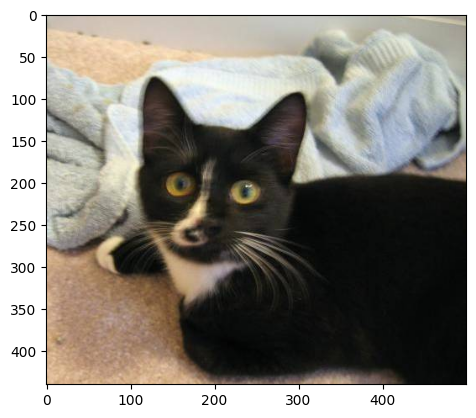

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[10])))

In [9]:
im = mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0]))


# AlexNet

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_alexnet(input_shape=(224, 224, 3), num_classes=2):
    model = Sequential()
    model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Conv2D(filters=384, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=384, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=num_classes, activation='sigmoid'))

    return model

model = create_alexnet()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 384)         1

In [ ]:
#Training the model
history6 = model.fit(validation_generator,epochs=15,validation_data=validation_generator)

Epoch 1/15
50/50 [==============================] - 75s 1s/step - loss: 0.7219 - accuracy: 0.5120 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/15
50/50 [==============================] - 70s 1s/step - loss: 0.6993 - accuracy: 0.4850 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 3/15
50/50 [==============================] - 70s 1s/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.7007 - val_accuracy: 0.5000
Epoch 4/15
50/50 [==============================] - 81s 2s/step - loss: 0.6970 - accuracy: 0.4890 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/15
50/50 [==============================] - 70s 1s/step - loss: 0.6943 - accuracy: 0.5080 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 6/15
50/50 [==============================] - 69s 1s/step - loss: 0.6957 - accuracy: 0.4880 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 7/15
50/50 [==============================] - 69s 1s/step - loss: 0.6962 - accuracy: 0.4840 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 8/15
50/50 [==

In [ ]:
model.evaluate(validation_generator)

50/50 [==============================] - 15s 290ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693168044090271, 0.5]

Text(0, 0.5, 'Accuracy')

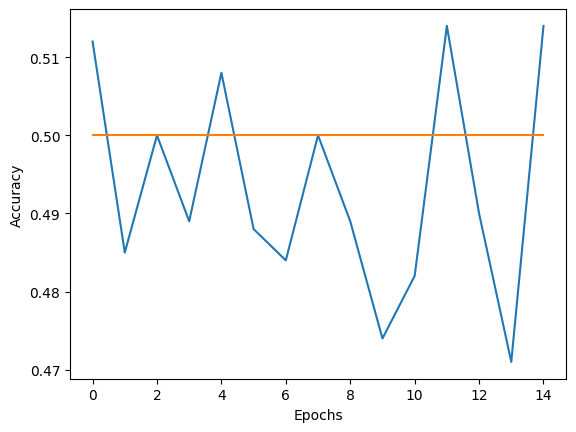

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

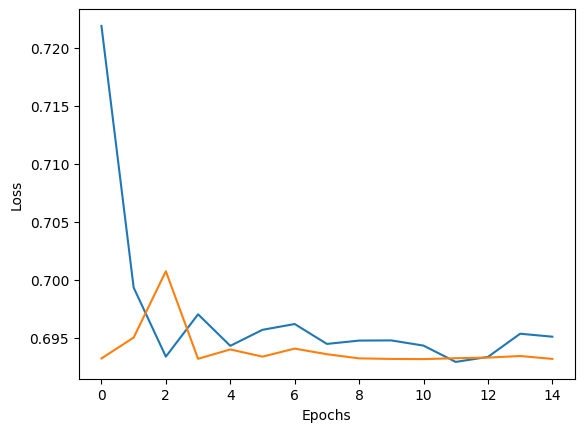

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [14]:
def LeNet5():
    model = tf.keras.Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model

model = LeNet5()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history7 = model.fit(validation_generator,epochs=5,validation_data=validation_generator)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 44944)             0         
                                                                 
 dense (Dense)               (None, 120)               5

In [15]:
import tensorflow as tf

In [16]:
model.evaluate(validation_generator)

50/50 [==============================] - 4s 70ms/step - loss: 0.0489 - accuracy: 0.9930


[0.048873137682676315, 0.9929999709129333]

Text(0, 0.5, 'Accuracy')

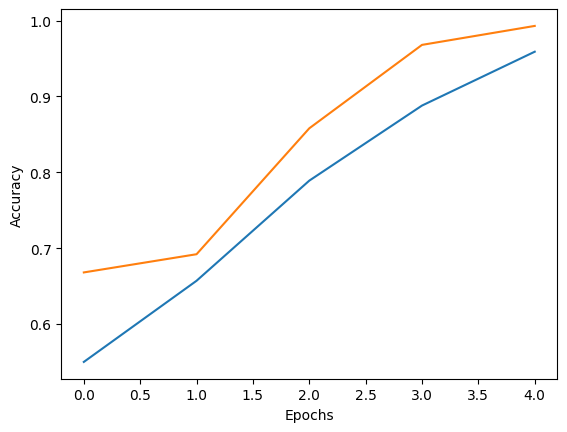

In [18]:
from matplotlib import pyplot as plt
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

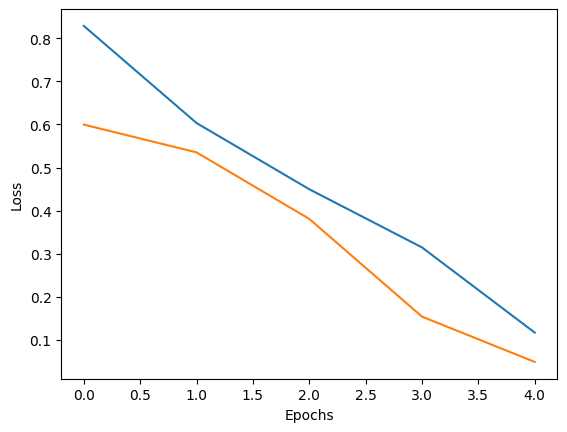

In [20]:
from matplotlib import pyplot as plt
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

# VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

2023-08-24 16:02:14.737699: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-24 16:02:14.754544: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-24 16:02:14.754685: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
Total params: 14764866 (56.32 MB)
Trainable params: 50178 (196.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
history1 = model.fit(validation_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20


2023-08-24 16:02:16.505076: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600


 1/50 [..............................] - ETA: 1:47 - loss: 0.8078 - acc: 0.6500

2023-08-24 16:02:17.593823: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-24 16:02:17.600329: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f6874fdb6d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-24 16:02:17.600346: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-08-24 16:02:17.603502: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-24 16:02:17.677893: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 [==============================] - 10s 150ms/step - loss: 0.5416 - acc: 0.7360 - val_loss: 0.3714 - val_acc: 0.8730
Epoch 2/20
50/50 [==============================] - 7s 146ms/step - loss: 0.3282 - acc: 0.8910 - val_loss: 0.2692 - val_acc: 0.9240
Epoch 3/20
50/50 [==============================] - 7s 145ms/step - loss: 0.2554 - acc: 0.9290 - val_loss: 0.2240 - val_acc: 0.9310
Epoch 4/20
50/50 [==============================] - 7s 147ms/step - loss: 0.2102 - acc: 0.9420 - val_loss: 0.2153 - val_acc: 0.9340
Epoch 5/20
50/50 [==============================] - 7s 146ms/step - loss: 0.1819 - acc: 0.9610 - val_loss: 0.1581 - val_acc: 0.9670
Epoch 6/20
50/50 [==============================] - 7s 148ms/step - loss: 0.1570 - acc: 0.9620 - val_loss: 0.1483 - val_acc: 0.9620
Epoch 7/20
50/50 [==============================] - 7s 147ms/step - loss: 0.1356 - acc: 0.9750 - val_loss: 0.1188 - val_acc: 0.9830
Epoch 8/20
50/50 [==============================] - 7s 149ms/step - loss: 0.1175 - acc

In [ ]:
model.evaluate(validation_generator)

50/50 [==============================] - 4s 76ms/step - loss: 0.0366 - acc: 1.0000


[0.036582693457603455, 1.0]

Text(0, 0.5, 'Accuracy')

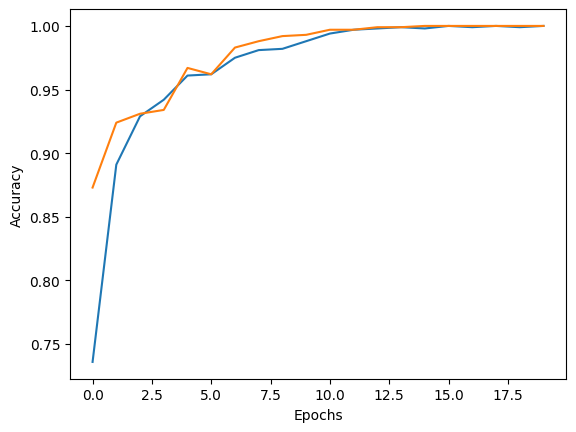

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

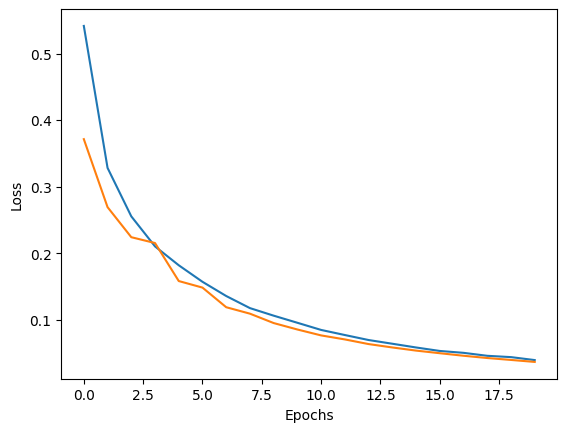

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# ResNet50

In [ ]:
from keras.applications import ResNet50
base_model = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23788418 (90.75 MB)
Trainable params: 200706 (784.01 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
history2 = model.fit(validation_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
50/50 [==============================] - 7s 102ms/step - loss: 0.7746 - acc: 0.5180 - val_loss: 0.6600 - val_acc: 0.5930
Epoch 2/20
50/50 [==============================] - 5s 95ms/step - loss: 0.6407 - acc: 0.6210 - val_loss: 0.6133 - val_acc: 0.6560
Epoch 3/20
50/50 [==============================] - 5s 96ms/step - loss: 0.6984 - acc: 0.5840 - val_loss: 0.5997 - val_acc: 0.6690
Epoch 4/20
50/50 [==============================] - 5s 94ms/step - loss: 0.6224 - acc: 0.6480 - val_loss: 0.5877 - val_acc: 0.6830
Epoch 5/20
50/50 [==============================] - 5s 96ms/step - loss: 0.6114 - acc: 0.6590 - val_loss: 0.5877 - val_acc: 0.6870
Epoch 6/20
50/50 [==============================] - 5s 93ms/step - loss: 0.6364 - acc: 0.6260 - val_loss: 0.5613 - val_acc: 0.7110
Epoch 7/20
50/50 [==============================] - 5s 95ms/step - loss: 0.5993 - acc: 0.6620 - val_loss: 0.6241 - val_acc: 0.6130
Epoch 8/20
50/50 [==============================] - 5s 92ms/step - loss: 0.6165 - 

In [ ]:
model.evaluate(validation_generator)

50/50 [==============================] - 2s 47ms/step - loss: 0.4993 - acc: 0.7420


[0.4993017911911011, 0.7419999837875366]

Text(0, 0.5, 'Accuracy')

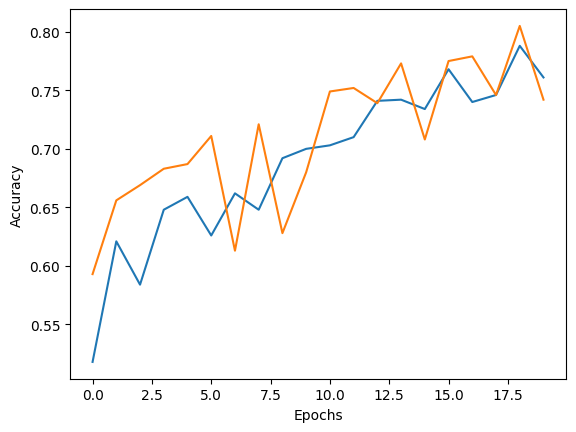

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

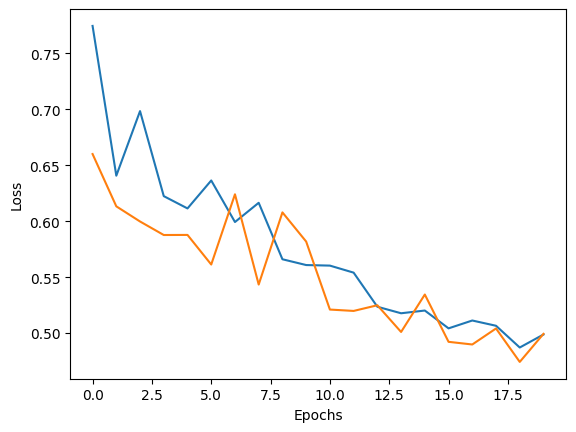

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

# MobileNetV2

In [ ]:
from keras.applications import MobileNetV2
base_model = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2383426 (9.09 MB)
Trainable params: 125442 (490.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
history3 = model.fit(validation_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
50/50 [==============================] - 4s 48ms/step - loss: 0.1680 - acc: 0.9450 - val_loss: 0.0231 - val_acc: 0.9910
Epoch 2/20
50/50 [==============================] - 2s 40ms/step - loss: 0.0268 - acc: 0.9920 - val_loss: 0.0036 - val_acc: 0.9990
Epoch 3/20
50/50 [==============================] - 2s 40ms/step - loss: 0.0019 - acc: 0.9990 - val_loss: 5.0283e-04 - val_acc: 1.0000
Epoch 4/20
50/50 [==============================] - 2s 41ms/step - loss: 4.7037e-04 - acc: 1.0000 - val_loss: 3.0236e-04 - val_acc: 1.0000
Epoch 5/20
50/50 [==============================] - 2s 41ms/step - loss: 2.9644e-04 - acc: 1.0000 - val_loss: 2.6833e-04 - val_acc: 1.0000
Epoch 6/20
50/50 [==============================] - 2s 40ms/step - loss: 2.5943e-04 - acc: 1.0000 - val_loss: 2.3332e-04 - val_acc: 1.0000
Epoch 7/20
50/50 [==============================] - 2s 41ms/step - loss: 2.3001e-04 - acc: 1.0000 - val_loss: 2.1046e-04 - val_acc: 1.0000
Epoch 8/20
50/50 [=============================

In [ ]:
model.evaluate(validation_generator)

50/50 [==============================] - 1s 20ms/step - loss: 7.8792e-05 - acc: 1.0000


[7.879175973357633e-05, 1.0]

Text(0, 0.5, 'Accuracy')

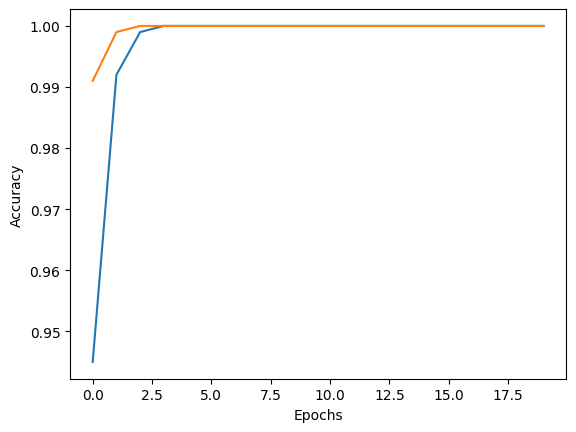

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

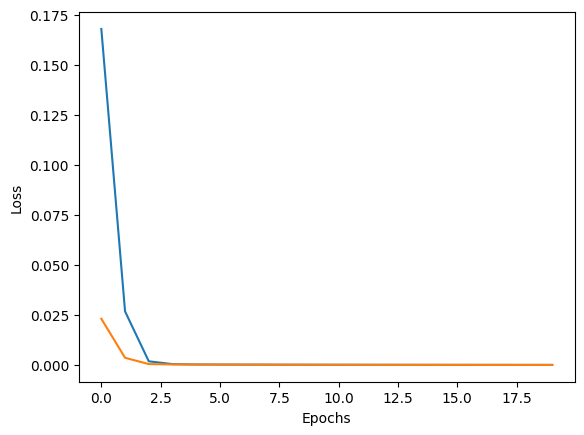

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

# EfficientNetB0

In [ ]:
from keras.applications import EfficientNetB0
base_model = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_4[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 62720)             0         
                                                                 
 dense_3 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4175013 (15.93 MB)
Trainable params: 125442 (490.01 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


In [ ]:
history4 = model.fit(validation_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
50/50 [==============================] - 7s 75ms/step - loss: 0.8987 - acc: 0.5080 - val_loss: 0.7673 - val_acc: 0.5000
Epoch 2/20
50/50 [==============================] - 3s 61ms/step - loss: 0.7256 - acc: 0.4910 - val_loss: 0.7178 - val_acc: 0.5000
Epoch 3/20
50/50 [==============================] - 3s 59ms/step - loss: 0.7409 - acc: 0.4880 - val_loss: 0.8464 - val_acc: 0.5000
Epoch 4/20
50/50 [==============================] - 3s 59ms/step - loss: 0.7609 - acc: 0.4880 - val_loss: 0.7077 - val_acc: 0.5000
Epoch 5/20
50/50 [==============================] - 3s 60ms/step - loss: 0.7433 - acc: 0.5090 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 6/20
50/50 [==============================] - 3s 60ms/step - loss: 0.7444 - acc: 0.4900 - val_loss: 0.7049 - val_acc: 0.5000
Epoch 7/20
50/50 [==============================] - 3s 60ms/step - loss: 0.7272 - acc: 0.5060 - val_loss: 0.7149 - val_acc: 0.5000
Epoch 8/20
50/50 [==============================] - 3s 60ms/step - loss: 0.7338 - a

In [ ]:
model.evaluate(validation_generator)

50/50 [==============================] - 2s 30ms/step - loss: 0.8705 - acc: 0.5000


[0.8705210089683533, 0.5]

Text(0, 0.5, 'Accuracy')

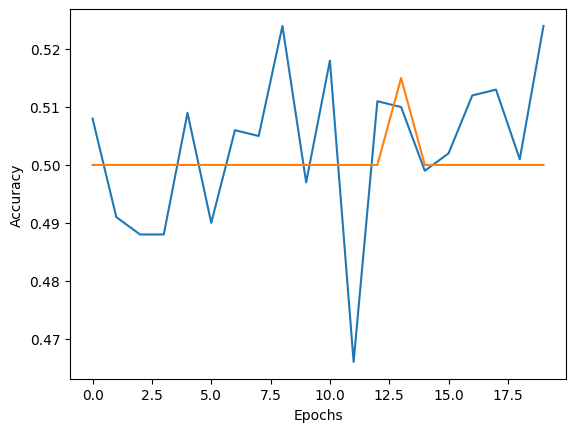

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

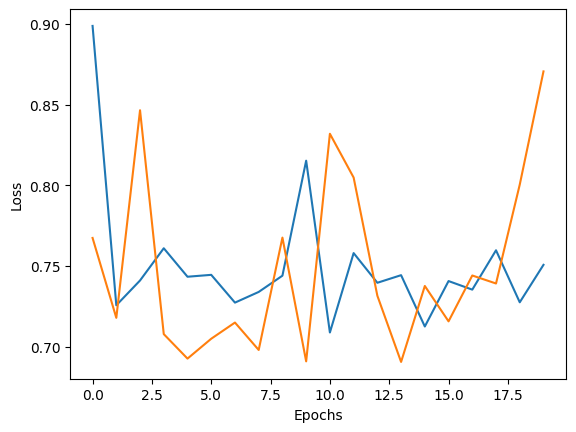

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

# GoogleNet

In [ ]:
from keras.applications import InceptionV3
base_model = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21905186 (83.56 MB)
Trainable params: 102402 (400.01 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [ ]:
history5 = model.fit(validation_generator,epochs=15,validation_data=validation_generator)

Epoch 1/15
50/50 [==============================] - 7s 73ms/step - loss: 0.1282 - acc: 0.9460 - val_loss: 0.0177 - val_acc: 0.9960
Epoch 2/15
50/50 [==============================] - 3s 55ms/step - loss: 0.0119 - acc: 0.9960 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 3/15
50/50 [==============================] - 3s 54ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 4/15
50/50 [==============================] - 3s 56ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 7.7942e-04 - val_acc: 1.0000
Epoch 5/15
50/50 [==============================] - 3s 56ms/step - loss: 7.3191e-04 - acc: 1.0000 - val_loss: 5.9244e-04 - val_acc: 1.0000
Epoch 6/15
50/50 [==============================] - 3s 56ms/step - loss: 5.7296e-04 - acc: 1.0000 - val_loss: 5.0329e-04 - val_acc: 1.0000
Epoch 7/15
50/50 [==============================] - 3s 55ms/step - loss: 4.9280e-04 - acc: 1.0000 - val_loss: 4.4098e-04 - val_acc: 1.0000
Epoch 8/15
50/50 [==============================] - 3s 

In [ ]:
model.evaluate(validation_generator)

50/50 [==============================] - 1s 28ms/step - loss: 1.9045e-04 - acc: 1.0000


[0.0001904524106066674, 1.0]

Text(0, 0.5, 'Accuracy')

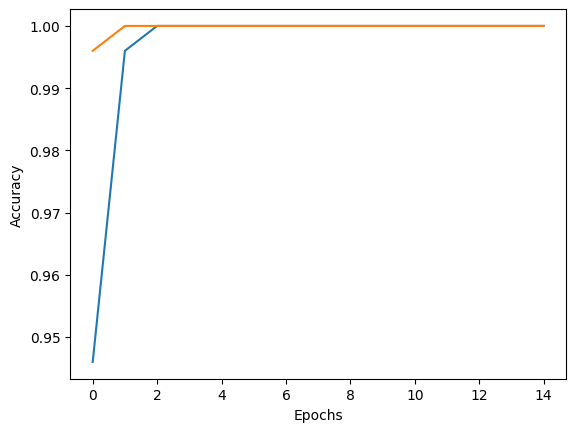

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

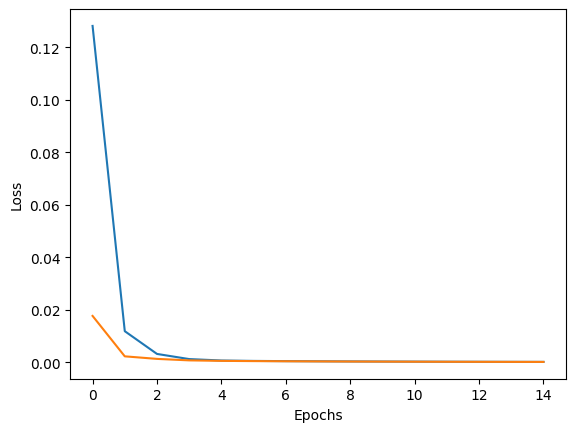

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')